# **PROJECT**

## **Painting Style Classifier**

This code lets you upload files (like kaggle.json) into Google Colab.

It sets up the Kaggle API key by moving it to the right folder and securing it.

This is needed to access Kaggle datasets or use the Kaggle API in the project.


In [ ]:
from google.colab import files
uploaded = files.upload()
for fn  in uploaded.keys():
  print('User uploaded  file"{name}"with length {length} bytes'.format(name=fn,length=len(uploaded[fn])))

#Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json/ &&chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
User uploaded  file"kaggle.json"with length 63 bytes
mv: missing destination file operand after 'kaggle.json/'
Try 'mv --help' for more information.


In our project, we use this code to download a dataset from Kaggle called "painter-by-numbers."

It helps us get the data we need to work with for our project right here in Google Colab.







In [ ]:
!kaggle datasets download -d  jaafaryassine/painter-by-numbers

Dataset URL: https://www.kaggle.com/datasets/jaafaryassine/painter-by-numbers
License(s): unknown
100% 2.24G/2.24G [01:54<00:00, 20.5MB/s]
100% 2.24G/2.24G [01:54<00:00, 21.0MB/s]


In [ ]:
#Import libraries
import pandas as pd  # Used for loading, analyzing, and manipulating tabular data, often from CSV files.
import numpy as np   # Provides support for large, multi-dimensional arrays and matrices, along with mathematical functions.
import matplotlib.pyplot as plt  # Used for creating static, interactive, and animated plots to visualize data.
import json          # Used for working with JSON files (reading/writing configuration or data).
import os            # Provides a way to interact with the operating system (file manipulation, checking directories).
from tqdm import tqdm, tqdm_notebook  # Used for creating progress bars in loops, helpful for tracking task progress.
import random        # Generates random numbers, selections, or shuffles in data.
import imageio       # Used for reading and writing image files.
import shutil        # Provides functions for file operations such as copying, moving, and deleting files.
import cv2           # OpenCV library used for image processing and computer vision tasks.
from PIL import Image  # Pillow library for opening, manipulating, and saving various image formats.
import zipfile       # Used to work with zip archives (extracting or creating compressed files).

import tensorflow as tf  # The TensorFlow library for building and training machine learning models.
from tensorflow.keras.models import Sequential, Model  # Used to define and create neural network architectures.
from tensorflow.keras.layers import *  # Imports various layers like Dense, Conv2D, etc., to build models.
from tensorflow.keras.optimizers import *  # Imports optimization algorithms to train models efficiently.
from tensorflow.keras.applications import *  # Provides pre-trained models for transfer learning.
from tensorflow.keras.callbacks import *  # Used to define custom actions to be executed during training (like early stopping).
from tensorflow.keras.initializers import *  # Used to initialize the weights of the model.
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # Used for real-time data augmentation during image preprocessing.

from numpy.random import seed  # Sets the seed for reproducibility in random operations.
seed(1)  # Ensures consistent results across runs.



Step 1: In our project, we first extract the dataset from the zip file.

This ensures that the data becomes accessible and ready for us to work with—whether that’s analyzing images or training our machine learning model.


In [ ]:
# Step 1: Extract the dataset
zip_file_path = '/content/painter-by-numbers.zip'
extracted_dir = '/content/painter-by-numbers'

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_dir)
print(f"Dataset extracted to {extracted_dir}")


Dataset extracted to /content/painter-by-numbers


Step 2: Next, we load the CSV file (imagesinfo.csv) that contains details about each image in the dataset.
:

In [ ]:
import pandas as pd

art = pd.read_csv('/content/painter-by-numbers/imagesinfo.csv')
art.head()


artist    date     genre  pixelsx  pixelsy  size_bytes   source  \
0  Barnett Newman  1955.0  abstract  15530.0   6911.0   9201912.0  wikiart   
1  Barnett Newman  1950.0  abstract  14559.0   6866.0   8867532.0  wikiart   
2     kiri nichol  2013.0       NaN   9003.0   9004.0   1756681.0      NaN   
3     kiri nichol  2013.0       NaN   9003.0   9004.0   1942046.0      NaN   
4     kiri nichol  2013.0       NaN   9003.0   9004.0   1526212.0      NaN   

                  style                  title    filename  
0  Color Field Painting                  Uriel  102257.jpg  
1  Color Field Painting  Vir Heroicus Sublimis   75232.jpg  
2         Neoplasticism                    NaN   32145.jpg  
3         Neoplasticism                    NaN   20304.jpg  
4         Neoplasticism                    NaN     836.jpg

In [ ]:
art['style'].unique()


array(['Color Field Painting', 'Neoplasticism', 'Yamato-e', 'Ukiyo-e',
       'Romanticism', 'Surrealism', 'Northern Renaissance', 'Cloisonnism',
       'Abstract Art', 'Realism', 'Biedermeier', 'Symbolism', 'Baroque',
       'Tenebrism', 'Cubism', 'Mannerism (Late Renaissance)',
       'Pointillism', 'Rococo', 'High Renaissance', 'Fauvism', nan,
       'Early Renaissance', 'Magic Realism', 'Classicism',
       'Post-Impressionism', 'Art Nouveau (Modern)', 'Expressionism',
       'Impressionism', 'Japonism', 'Neoclassicism',
       'Contemporary Realism', 'Suprematism', 'Naïve Art (Primitivism)',
       'Tachisme', 'Ink and wash painting', 'Orphism', 'Luminism',
       'Neo-Rococo', 'Orientalism', 'Academicism', 'Tonalism', 'Op Art',
       'Neo-Romanticism', 'Constructivism', 'Dada', 'Neo-Expressionism',
       'Abstract Expressionism', 'Proto Renaissance',
       'Lyrical Abstraction', 'Byzantine', 'Muralism', 'Art Informel',
       'Analytical\xa0Realism', 'Concretism', 'Art Brut', 

In [ ]:
art['style'].nunique()

136

This code extracts and displays a random selection of 5 paintings from the dataset.
It reads all the images from the /content/painter-by-numbers/images directory.
It randomly picks 5 image files and then uses matplotlib to display them in a grid.
The images are shown without axes for better visual clarity, and their titles (painting names) are displayed below each image.






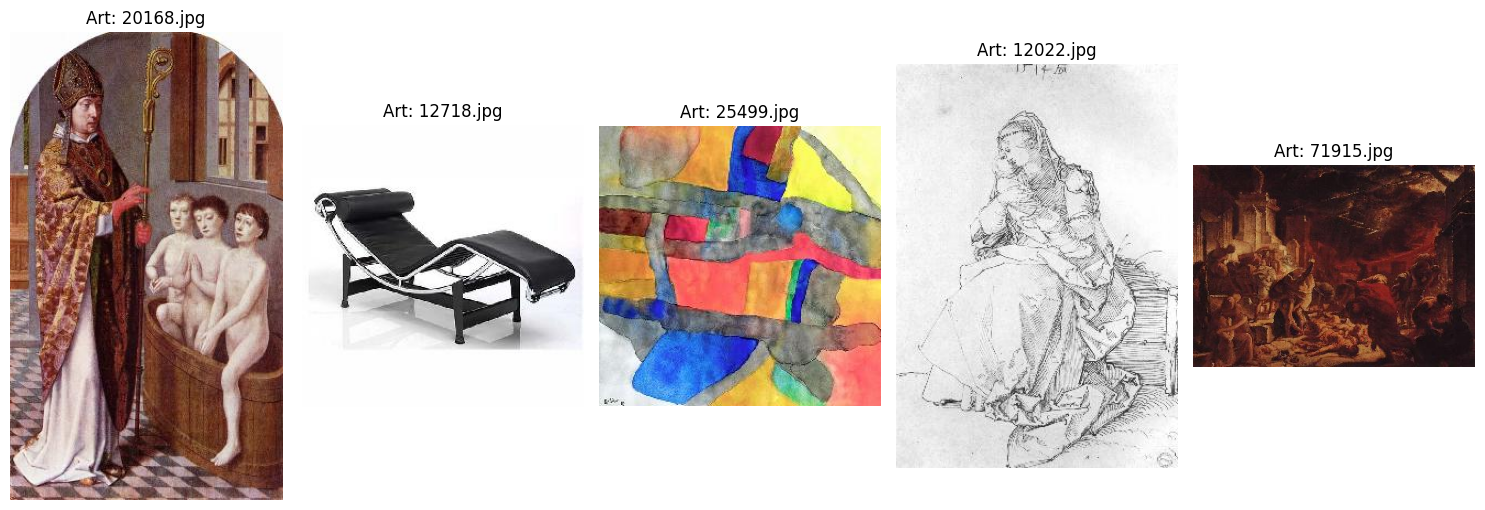

In [ ]:
# Print few random paintings
import os
import matplotlib.pyplot as plt
import random

# Specify the base directory
base_dir = '/content/painter-by-numbers/images'

# Check if the directory exists
if not os.path.exists(base_dir):
    raise FileNotFoundError(f"Directory {base_dir} does not exist. Please check the path.")

# Get a list of all image files in the directory
image_files = [f for f in os.listdir(base_dir) if os.path.isfile(os.path.join(base_dir, f))]

# Ensure the list is not empty
if not image_files:
    raise FileNotFoundError(f"No image files found in {base_dir}. Please verify the dataset is properly loaded.")

# Randomly select 5 images
random_images = random.sample(image_files, 5)

# Plot the images
fig, axes = plt.subplots(1, 5, figsize=(15, 5))
for i, random_art in enumerate(random_images):
    random_image_file = os.path.join(base_dir, random_art)

    # Read and display the image
    image = plt.imread(random_image_file)
    axes[i].imshow(image)
    axes[i].set_title(f"Art: {random_art.replace('_', ' ')}")
    axes[i].axis('off')  # Hide axes

plt.tight_layout()
plt.show()


### Getting the top 5 art styles and assigning weights for each of them



In this part we identify the top 5 painting styles from our dataset.

Next, we calculate a class weight for each of these top styles.

This code will guide us in balancing our data when training the model, ensuring each style has equal influence in the learning process.



In [ ]:
TOP_N = 5
top_styles = art['style'].value_counts()[0:TOP_N].reset_index()
top_styles.columns = ['style', 'count']
top_styles['class_weight'] = top_styles['count'].sum() / (top_styles.shape[0] * top_styles['count'])
top_styles

style  count  class_weight
0       Impressionism  10643      0.812590
1             Realism  10523      0.821857
2         Romanticism   9285      0.931438
3       Expressionism   7013      1.233195
4  Post-Impressionism   5778      1.496781

In [ ]:
# Set class weights - assign higher weights to underrepresented classes
class_weights = top_styles['class_weight'].to_dict()
class_weights

{0: 0.8125904350277178,
 1: 0.8218568849187494,
 2: 0.931437802907916,
 3: 1.2331954940824184,
 4: 1.4967808930425752}

### Assigning the top styles to a list


In [ ]:
filter_list = top_styles['style']
filter_list = filter_list.tolist()
filter_list

['Impressionism',
 'Realism',
 'Romanticism',
 'Expressionism',
 'Post-Impressionism']

### Filtering the data, getting only images of the top 5 art styles


Next, we filter the dataset to focus only on specific painting styles.

We then extract the filenames and their corresponding styles.

Finally, we extract all unique styles from the filtered data.

This filtered dataset allows us to focus on specific styles, helping us analyze and train models on particular categories of paintings.



In [ ]:
fdata = art[art['style'].isin(filter_list)]
images = fdata[['filename','style']]
images.reset_index(drop= True, inplace=True)
images["filename"] = '../input/painter-by-numbers/images/'+images["filename"]

artstyles = fdata['style'].unique()
artstyles

<ipython-input-13-aaf17fafabfd>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  images["filename"] = '../input/painter-by-numbers/images/'+images["filename"]


array(['Romanticism', 'Realism', 'Post-Impressionism', 'Expressionism',
       'Impressionism'], dtype=object)

### Export filtered data to a new .csv file

in this part we:
We start by saving the filtered data to a CSV file.

Next, we filter images by specific styles and process each one individually.

Finally, we get a list of all the image filenames in the dataset.

This part of the code helps us to filter images based on different painting styles and prepare them for further analysis or model training.

The filenames are stored in separate lists, making it easy to work with specific groups of images for different style categories.


In [ ]:
fdata.to_csv('filtered.csv')
# Filter images by style and process each style
impressionism = images[images["style"] == "Impressionism"]
impressionism.reset_index(drop=True, inplace=True)
impressionism = impressionism['filename'].values.tolist()

realism = images[images["style"] == "Realism"]
realism.reset_index(drop=True, inplace=True)
realism = realism['filename'].values.tolist()

romanticism = images[images["style"] == "Romanticism"]
romanticism.reset_index(drop=True, inplace=True)
romanticism = romanticism['filename'].values.tolist()

expressionism = images[images["style"] == "Expressionism"]
expressionism.reset_index(drop=True, inplace=True)
expressionism = expressionism['filename'].values.tolist()

postimpressionism = images[images["style"] == "Post-Impressionism"]
postimpressionism.reset_index(drop=True, inplace=True)
postimpressionism = postimpressionism['filename'].values.tolist()

# Get the list of files in the specified directory
mypath = "/content/painter-by-numbers/images"
onlyfiles = [f for f in os.listdir(mypath) if os.path.isfile(os.path.join(mypath, f))]




### Create sub folders in mypath folder

This setup ensures that each style's images are stored in their respective folders, making it easier to manage and analyze the data later.



In [ ]:
# Define the base directory for filtered images
base_dir = "/content/filtered-painter-by-numbers/images"

# Define folders for each style under the base directory
impressionism_folder = os.path.join(base_dir, "Impressionism")
realism_folder = os.path.join(base_dir, "Realism")
romanticism_folder = os.path.join(base_dir, "Romanticism")
expressionism_folder = os.path.join(base_dir, "Expressionism")
postimpressionism_folder = os.path.join(base_dir, "Post-Impressionism")


### Check if they already exits to prevent error

In [ ]:
# Create directories if they don't exist
os.makedirs(impressionism_folder, exist_ok=True)
os.makedirs(realism_folder, exist_ok=True)
os.makedirs(romanticism_folder, exist_ok=True)
os.makedirs(expressionism_folder, exist_ok=True)
os.makedirs(postimpressionism_folder, exist_ok=True)

### Move files to their respective sub folders



This part of the code ensures that each style’s images are neatly organized into separate folders for easier access and analysis."


In [ ]:
import os
import shutil

# Base directories
filtered_base_dir = '/content/filtered-painter-by-numbers/images'
original_base_dir = '/content/painter-by-numbers/images'

# Define subfolders for each style within the filtered dataset
styles = {
    "Impressionism": impressionism,
    "Realism": realism,
    "Romanticism": romanticism,
    "Expressionism": expressionism,
    "Post-Impressionism": postimpressionism
}

# Loop through each style and process its files
for style_name, style_list in styles.items():
    # Define the folder path for this style
    style_folder = os.path.join(filtered_base_dir, style_name)
    os.makedirs(style_folder, exist_ok=True)  # Ensure the style folder exists

    # Process each file in the style list
    for i in style_list:
        # Clean up the original path
        cleaned_path = i.replace('../input/painter-by-numbers/images/', '')

        # Check if the file exists in the filtered dataset first
        filtered_path = os.path.join(filtered_base_dir, cleaned_path)

        # If not found in the filtered dataset, check in the original dataset
        if os.path.isfile(filtered_path):
            source_path = filtered_path
        else:
            original_path = os.path.join(original_base_dir, cleaned_path)
            if os.path.isfile(original_path):
                source_path = original_path
            else:
                print(f"File not found: {cleaned_path}")
                continue  # Skip to the next file if not found in either dataset

        # Copy the file to the respective style folder
        shutil.copy(source_path, style_folder)
        print(f"Copied: {source_path} to {style_folder}")



Streaming output truncated to the last 5000 lines.
Copied: /content/painter-by-numbers/images/97618.jpg to /content/filtered-painter-by-numbers/images/Post-Impressionism
Copied: /content/painter-by-numbers/images/21375.jpg to /content/filtered-painter-by-numbers/images/Post-Impressionism
Copied: /content/painter-by-numbers/images/55450.jpg to /content/filtered-painter-by-numbers/images/Post-Impressionism
Copied: /content/painter-by-numbers/images/30878.jpg to /content/filtered-painter-by-numbers/images/Post-Impressionism
Copied: /content/painter-by-numbers/images/81104.jpg to /content/filtered-painter-by-numbers/images/Post-Impressionism
Copied: /content/painter-by-numbers/images/36365.jpg to /content/filtered-painter-by-numbers/images/Post-Impressionism
Copied: /content/painter-by-numbers/images/97249.jpg to /content/filtered-painter-by-numbers/images/Post-Impressionism
Copied: /content/painter-by-numbers/images/88525.jpg to /content/filtered-painter-by-numbers/images/Post-Impressioni

## PART II - BUILDING THE MODEL - DATASET II "filtered-painter-by-numbers"


**Reading the filtered data from the filtered csv file:**


In [ ]:
fil_art = pd.read_csv('/content/filtered.csv')
fil_art.head()

Unnamed: 0                     artist    date               genre  pixelsx  \
0           9  Franz Richard Unterberger     NaN           cityscape   6238.0   
1          14            Ivan Aivazovsky    1873              marina   7444.0   
2          24     Julius LeBlanc Stewart    1896      genre painting   6980.0   
3          25                Jan Matejko  1891.0    history painting   7459.0   
4          28               Gustave Dore    1866  religious painting   4915.0   

   pixelsy  size_bytes     source        style  \
0   7352.0   7896792.0    wikiart  Romanticism   
1   5811.0   3189597.0    wikiart  Romanticism   
2   4724.0   2484194.0    wikiart      Realism   
3   4135.0   7284812.0  wikipedia  Romanticism   
4   6068.0  29811319.0    wikiart  Romanticism   

                                  title   filename  
0                 Procession in Naples   84512.jpg  
1                          Storm at sea  99442.jpg  
2         Yachting in the Mediterranean  28908.jpg  
3  The Constitution of the 3rd May 1791  75956.jpg  
4                      Death of Eleazer   7486.jpg

In [ ]:


fil_art['style'].count()

43242

In [ ]:
filtered_imgdir = "/content/filtered-painter-by-numbers/images"

In this part of the code, we count the number of images in each style’s directory.



In [ ]:
import os

# Path to the filtered image directory
filtered_imgdir = "/content/filtered-painter-by-numbers/images"

# Define the styles
styles = [
    "Impressionism",
    "Realism",
    "Romanticism",
    "Expressionism",
    "Post-Impressionism"
]

# Function to count image files in a given directory
def count_images_in_directory(directory):
    image_count = 0
    # Walk through the directory and count image files
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.endswith(('.jpg', '.jpeg', '.png')):  # You can add more extensions if needed
                image_count += 1
    return image_count

# Loop through each style and count images
for style in styles:
    style_directory = os.path.join(filtered_imgdir, style)
    if os.path.exists(style_directory):
        num_images = count_images_in_directory(style_directory)
        print(f"{style}: {num_images} images")
    else:
        print(f"{style} directory does not exist.")


Impressionism: 10643 images
Realism: 10523 images
Romanticism: 9285 images
Expressionism: 7013 images
Post-Impressionism: 5778 images


## **Data Augmentation**

We start by preparing our data for training using ImageDataGenerator.

First, we set up data augmentation for the training phase. This helps the model learn more from the limited data we have by applying transformations like rotation, flipping, and scaling.
train_datagen: This configuration applies several augmentation techniques such as rotation_range=10, shear_range=5, and flipping both horizontally and vertically. It also rescales the pixel values between 0 and 1, making the data easier to work with.

Next, we set up train_generator and valid_generator to load the data:

train_generator loads the images from our dataset, specifically the filtered images divided into different painting styles like Impressionism, Realism, etc.

class_mode='categorical' ensures that the labels for the images are one-hot encoded, which is essential for multi-class classification.

target_size=(224, 224) resizes the images to a standard size that models can process.

batch_size=32 means that during training, the model will work with batches of 32 images at a time.

subset="training" uses 80% of the dataset for training and shuffles the data to ensure randomness.

valid_generator is set up similarly but loads the 20% validation data, again with no augmentation. It’s important to evaluate the model on unseen data to prevent overfitting.

Now, let's talk about steps per epoch:

STEP_SIZE_TRAIN calculates how many batches will be processed in one training epoch. It’s the total number of images divided by the batch size.
STEP_SIZE_VALID calculates the number of batches in one validation epoch.


In [ ]:
# Augment data
batch_size = 32
train_input_shape = (224, 224, 3)
n_classes = top_styles.shape[0]

train_datagen = ImageDataGenerator(validation_split=0.2,
                                   rescale=1./255.,
                                   rotation_range=10,
                                   shear_range=5,
                                   horizontal_flip=True,
                                   vertical_flip=True
                                  )


# Train generator
train_generator = train_datagen.flow_from_directory(directory=filtered_imgdir,
                                                    class_mode='categorical',
                                                    target_size=train_input_shape[0:2],
                                                    batch_size=batch_size,
                                                    subset="training",
                                                    shuffle=True,
                                                    classes=artstyles.tolist()
                                                   )

# Validation generator
valid_generator = train_datagen.flow_from_directory(directory=filtered_imgdir,
                                                    class_mode='categorical',
                                                    target_size=train_input_shape[0:2],
                                                    batch_size=batch_size,
                                                    subset="validation",
                                                    shuffle=True,
                                                    classes=artstyles.tolist()
                                                   )



# Steps per epoch
STEP_SIZE_TRAIN = train_generator.n // train_generator.batch_size
STEP_SIZE_VALID = valid_generator.n // valid_generator.batch_size

print("Total number of batches:")
print("Training =", STEP_SIZE_TRAIN)
print("Validation =", STEP_SIZE_VALID)


Found 34596 images belonging to 5 classes.
Found 8646 images belonging to 5 classes.
Total number of batches:
Training = 1081
Validation = 270


In this part of the code, we demonstrate the augmentation of a random painting from our dataset.

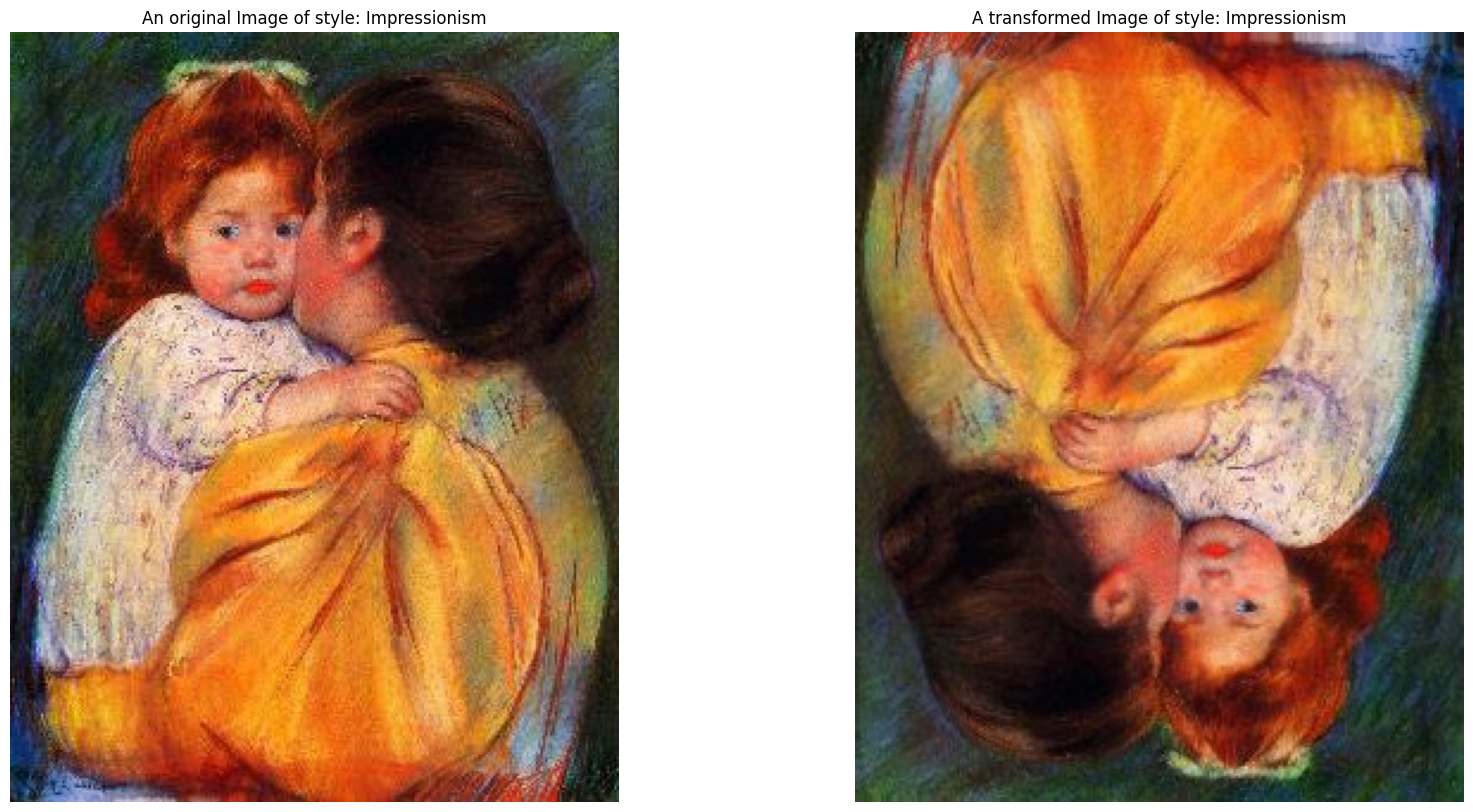

In [ ]:
# Print a random paintings and it's random augmented version
fig, axes = plt.subplots(1, 2, figsize=(20,10))

random_art = random.choice(artstyles)
random_image = random.choice(os.listdir(os.path.join(filtered_imgdir, random_art)))
random_image_file = os.path.join(filtered_imgdir, random_art, random_image)

# Original image
image = plt.imread(random_image_file)
axes[0].imshow(image)
axes[0].set_title("An original Image of style: " + random_art.replace('_', ' '))
axes[0].axis('off')

# Transformed image
aug_image = train_datagen.random_transform(image)
axes[1].imshow(aug_image)
axes[1].set_title("A transformed Image of style: " + random_art.replace('_', ' '))
axes[1].axis('off')

plt.show()

## **Building the Model**


In this code, we load a pre-trained model from the ResNet50 architecture, which is commonly used for image classification tasks.

ResNet50(weights='imagenet'): This loads a pre-trained ResNet50 model that was trained on the ImageNet dataset, which contains a vast number of images across different categories. This provides a strong foundation for our model to start from.
include_top=False: This indicates that we do not need the fully connected layers (top layers) of the pre-trained model; instead, we focus on using the feature extraction part of the model.
input_shape=train_input_shape: This specifies the input shape that matches the size of our images (224x224x3), ensuring that the model receives images in the correct format.


In [ ]:
# Load pre-trained model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=train_input_shape)

for layer in base_model.layers:
    layer.trainable = True

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In this code, we examine the output of the pre-trained model (ResNet50) and see how it processes the image data.

print(base_model.output): This line prints the output of the pre-trained ResNet50 model. It shows the final feature map that is generated after the image has passed through the convolutional layers of the model.
Flatten()(base_model.output): This flattens the output of the pre-trained model into a one-dimensional array. Flattening is a common step in image classification tasks, as it turns the multi-dimensional feature maps into a vector that can be passed into fully connected (dense) layers for prediction.


In [ ]:
print(base_model.output)
print(Flatten()(base_model.output))

<KerasTensor shape=(None, 7, 7, 2048), dtype=float32, sparse=False, name=keras_tensor_174>
<KerasTensor shape=(None, 100352), dtype=float32, sparse=False, name=keras_tensor_175>


In this part of the code, we are building the classification layers on top of the pre-trained ResNet50 model.

First, we take the output from the pre-trained ResNet50 model, which already extracts meaningful features from images.
X = Flatten()(base_model.output): Since the feature maps from ResNet50 are multi-dimensional, we flatten them into a one-dimensional array that can be processed further by dense (fully connected) layers.
Next, we add fully connected (dense) layers to the model:

Dense(512, kernel_initializer='he_uniform')(X): This is the first dense layer with 512 units. We use He initialization for the weights, which helps in better convergence during training.
Dropout(0.5): To prevent overfitting, we randomly drop 50% of the neurons during training. This makes the model more robust by learning more generalized patterns.
BatchNormalization(): Normalization helps to stabilize the learning process by adjusting the input of each layer, which speeds up training and improves convergence.
Activation('relu'): The activation function used here is ReLU, which introduces non-linearity into the network, allowing the model to learn complex relationships in the data.
**We continue by adding additional fully connected layers:

Dense(16, kernel_initializer='he_uniform')(X): This is the second dense layer with 16 units.
Dropout(0.5): Again, 50% dropout is applied to prevent overfitting.
BatchNormalization(): Normalizes the input to this layer, speeding up the training.
Activation('relu'): The ReLU activation introduces more non-linearity to capture different features from the paintings.
**Finally, we add the output layer:

Dense(n_classes, activation='softmax')(X): This is the output layer where we have n_classes units, corresponding to each painting style (Impressionism, Realism, etc.). The softmax activation function converts the output into probabilities for each style, making it suitable for multi-class classification.


In [ ]:

# Add layers at the end
X = base_model.output
X = Flatten()(X)

X = Dense(512, kernel_initializer='he_uniform')(X)
X = Dropout(0.5)(X)
X = BatchNormalization()(X)
X = Activation('relu')(X)

X = Dense(16, kernel_initializer='he_uniform')(X)
X = Dropout(0.5)(X)
X = BatchNormalization()(X)
X = Activation('relu')(X)

output = Dense(n_classes, activation='softmax')(X)

model = Model(inputs=base_model.input, outputs=output)



In [ ]:
#The model.summary() function provides a detailed breakdown of our entire model architecture.
# This allows us to understand the different layers, their configurations, and how data flows through the model.
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 230, 230, 3)    │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 112, 112, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 112, 112, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 112, 112, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 114, 114, 64)   │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 56, 56, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 56, 56, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 56, 56, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 56, 56, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 56, 56, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├──────────────────────

 Total params: 74,978,853 (286.02 MB)

 Trainable params: 74,924,677 (285.81 MB)

 Non-trainable params: 54,176 (211.62 KB)

In this code, we define the Adam optimizer with a learning rate of 0.0001, which helps the model update weights efficiently during training. We then compile the model using categorical_crossentropy as the loss function, ideal for multi-class classification (painting styles). The accuracy metric monitors how well the model performs.

This solution is effective because the Adam optimizer adapts learning rates, categorical_crossentropy handles multi-class tasks, and accuracy provides clear feedback, making it well-suited for classifying painting styles.



In [ ]:
optimizer = Adam(learning_rate=0.0001)
model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

In [ ]:
n_epoch = 15


We train the model using all layers. The fit() function takes in the train_generator, which generates batches of training data, and the valid_generator, which provides validation data.
The model is trained over n_epoch (the number of epochs specified).

shuffle=True ensures that the data is randomly shuffled between epochs, preventing the model from learning patterns that might exist in the order.


In [ ]:
# Train the model - all layers
history1 = model.fit(
    train_generator,
    validation_data=valid_generator,
    epochs=n_epoch,
    shuffle=True,
)


Epoch 1/15


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1082/1082 ━━━━━━━━━━━━━━━━━━━━ 735s 607ms/step - accuracy: 0.4118 - loss: 1.4151 - val_accuracy: 0.5185 - val_loss: 1.2137
Epoch 2/15
1082/1082 ━━━━━━━━━━━━━━━━━━━━ 669s 571ms/step - accuracy: 0.5362 - loss: 1.1808 - val_accuracy: 0.5606 - val_loss: 1.1387
Epoch 3/15
1082/1082 ━━━━━━━━━━━━━━━━━━━━ 656s 604ms/step - accuracy: 0.5733 - loss: 1.1152 - val_accuracy: 0.5555 - val_loss: 1.1138
Epoch 4/15
1082/1082 ━━━━━━━━━━━━━━━━━━━━ 624s 573ms/step - accuracy: 0.5889 - loss: 1.0816 - val_accuracy: 0.5601 - val_loss: 1.1350
Epoch 5/15
1082/1082 ━━━━━━━━━━━━━━━━━━━━ 684s 576ms/step - accuracy: 0.5693 - loss: 1.1080 - val_accuracy: 0.6177 - val_loss: 0.9615
Epoch 6/15
1082/1082 ━━━━━━━━━━━━━━━━━━━━ 629s 579ms/step - accuracy: 0.6170 - loss: 1.0197 - val_accuracy: 0.5958 - val_loss: 1.0332
Epoch 7/15
1082/1082 ━━━━━━━━━━━━━━━━━━━━ 616s 567ms/step - accuracy: 0.6360 - loss: 0.9890 - val_accuracy: 0.6083 - val_loss: 1.0056
Epoch 8/15
1082/1082 ━━━━━━━━━━━━━━━━━━━━ 657s 604ms/step - accuracy: 0.6

In this part of the code, we fine-tune the pre-trained ResNet50 model to classify different painting styles. Initially, we freeze the core layers of the model to leverage the pre-trained features, ensuring the model starts with strong general knowledge. Then, we unfreeze the first 50 layers, allowing the model to gradually learn specific patterns related to painting styles. We use the Adam optimizer with a learning rate of 0.0001 for stable updates, and categorical crossentropy as the loss function to measure the accuracy of multi-class classification.

We also include EarlyStopping to prevent overfitting by stopping training when validation loss stops improving, ReduceLROnPlateau to dynamically adjust the learning rate, and ModelCheckpoint to save the best-performing model based on validation accuracy. This approach ensures effective fine-tuning, optimized performance, and robust model selection, making it a strong solution for classifying painting styles.



In [ ]:
# Freeze core ResNet layers and train again
for layer in model.layers:
    layer.trainable = False

for layer in model.layers[:50]:
    layer.trainable = True

optimizer = Adam(learning_rate=0.0001)

model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])
from keras.callbacks import ModelCheckpoint

early_stop = EarlyStopping(monitor='val_loss', patience=20, verbose=1,
                           mode='auto', restore_best_weights=True)

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5,
                              verbose=1, mode='auto')
model_checkpoint = ModelCheckpoint('Art_model.keras', monitor='val_accuracy', save_best_only=True)


n_epoch = 10
history2 = model.fit(train_generator,
                              validation_data=valid_generator,
                              epochs=n_epoch,
                              shuffle=True,
                              verbose=1,
                              callbacks=[reduce_lr, early_stop,model_checkpoint],
                              class_weight=class_weights
                             )

Epoch 1/10
1082/1082 ━━━━━━━━━━━━━━━━━━━━ 619s 546ms/step - accuracy: 0.7632 - loss: 0.7103 - val_accuracy: 0.6583 - val_loss: 0.9463 - learning_rate: 1.0000e-04
Epoch 2/10
1082/1082 ━━━━━━━━━━━━━━━━━━━━ 578s 532ms/step - accuracy: 0.7684 - loss: 0.6872 - val_accuracy: 0.6637 - val_loss: 0.9304 - learning_rate: 1.0000e-04
Epoch 3/10
1082/1082 ━━━━━━━━━━━━━━━━━━━━ 576s 530ms/step - accuracy: 0.7694 - loss: 0.6829 - val_accuracy: 0.6677 - val_loss: 0.9189 - learning_rate: 1.0000e-04
Epoch 4/10
1082/1082 ━━━━━━━━━━━━━━━━━━━━ 625s 533ms/step - accuracy: 0.7767 - loss: 0.6645 - val_accuracy: 0.6542 - val_loss: 0.9895 - learning_rate: 1.0000e-04
Epoch 5/10
1082/1082 ━━━━━━━━━━━━━━━━━━━━ 617s 568ms/step - accuracy: 0.7758 - loss: 0.6720 - val_accuracy: 0.6628 - val_loss: 0.9360 - learning_rate: 1.0000e-04
Epoch 6/10
1082/1082 ━━━━━━━━━━━━━━━━━━━━ 587s 535ms/step - accuracy: 0.7776 - loss: 0.6587 - val_accuracy: 0.6561 - val_loss: 0.9639 - learning_rate: 1.0000e-04
Epoch 7/10
1082/1082 ━━━━━━━

In this code, we merge the training history from two phases:

history1: Represents the training results from the first round where all layers were fine-tuned.
history2: Shows the training results after freezing the core layers and focusing on fine-tuning only the early layers.
In this code, we merge the training history from two phases:

This merging allows us to analyze the progress and effectiveness of both phases, ensuring a comprehensive view of model performance throughout training.




In [ ]:
# Merge history1 and history2
history = {}
history['loss'] = history1.history['loss'] + history2.history['loss']
history['accuracy'] = history1.history['accuracy'] + history2.history['accuracy']
history['val_loss'] = history1.history['val_loss'] + history2.history['val_loss']
history['val_accuracy'] = history1.history['val_accuracy'] + history2.history['val_accuracy']


In this part of the code, the trained model is saved in Keras format.

The model is saved using model.save() to store all layers, weights, and configurations.
Once saved, the model is ready to be downloaded by clicking the link provided by files.download().


In [ ]:
from google.colab import files

# Save the model
model.save('/content/Art_model.keras')  # Save model in keras format

# Download the saved model
files.download('/content/Art_model.keras')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## **TRAING GRAPH**

In this code, we plot the training progress, showcasing both accuracy and loss during training and validation phases.

By plotting the training graph, we can see how the model is performing. The accuracy on both the training and validation sets is increasing over epochs, indicating that the model is learning effectively. At the same time, the loss is decreasing, which means the model is getting better at making predictions. This shows that the model is progressing well in terms of both learning and generalization to unseen data.



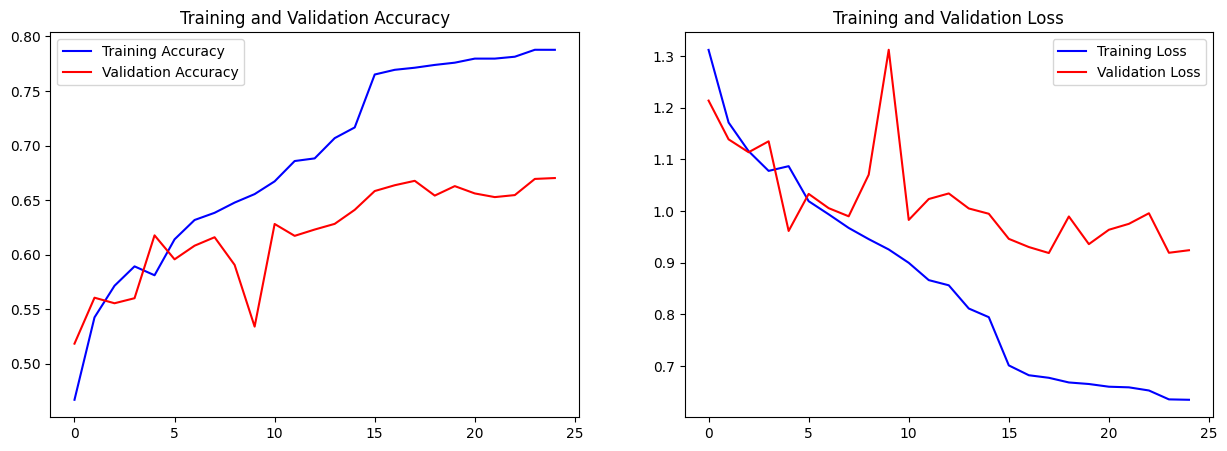

In [ ]:
# Plot the training graph
def plot_training(history):
    acc = history['accuracy']
    val_acc = history['val_accuracy']
    loss = history['loss']
    val_loss = history['val_loss']
    epochs = range(len(acc))

    fig, axes = plt.subplots(1, 2, figsize=(15,5))

    axes[0].plot(epochs, acc, 'b-', label='Training Accuracy')
    axes[0].plot(epochs, val_acc, 'r-', label='Validation Accuracy')
    axes[0].set_title('Training and Validation Accuracy')
    axes[0].legend(loc='best')

    axes[1].plot(epochs, loss, 'b-', label='Training Loss')
    axes[1].plot(epochs, val_loss, 'r-', label='Validation Loss')
    axes[1].set_title('Training and Validation Loss')
    axes[1].legend(loc='best')

    plt.show()

plot_training(history)

### Evaluate performance


In this code, the model’s accuracy on the training data is evaluated. After training, we use the evaluate() function to calculate the model’s performance on the training set. The score returned shows different metrics, where score[1] represents the prediction accuracy.

From this, we can see how well the model classifies the training images, providing a measure of confidence in its predictions.



In [ ]:
# Prediction accuracy on train data
score = model.evaluate(train_generator, verbose=1)
print("Prediction accuracy on train data =", score[1])


1082/1082 ━━━━━━━━━━━━━━━━━━━━ 421s 389ms/step - accuracy: 0.8149 - loss: 0.5013
Prediction accuracy on train data = 0.8121747970581055


In this part of the code, the model’s accuracy on the validation data is evaluated. Using the evaluate() function, we calculate the model’s performance on unseen validation images. score[1] shows the prediction accuracy on this data.

This helps us understand how well the model generalizes to new data, beyond what it learned during training. A higher accuracy here indicates that the model is making reliable predictions on unseen examples.



In [ ]:
# Prediction accuracy on CV data
score = model.evaluate(valid_generator, verbose=1)
print("Prediction accuracy on CV data =", score[1])

271/271 ━━━━━━━━━━━━━━━━━━━━ 105s 388ms/step - accuracy: 0.6639 - loss: 0.9188
Prediction accuracy on CV data = 0.6656257510185242


### **Confusion Matrix.** Look at the styles which the model thinks are almost similar.


### **Confusion Matrix Analysis**
The confusion matrix evaluates the performance of our painting style classifier across five categories: Romanticism, Realism, Post-Impressionism, Expressionism, and Impressionism.

**Romanticism:**

The model predicts Romanticism correctly 90% of the time.
It shows minor confusion with Realism (7%) and negligible misclassifications with other styles.
**Realism:**

The model achieves 73% accuracy for Realism.
It often misclassifies paintings as Romanticism (17%) and occasionally as Post-Impressionism (8%).
**Post-Impressionism:**

The model classifies 63% of Post-Impressionism paintings correctly.
Misclassifications occur frequently as Expressionism (13%) and Realism (9%).
**Expressionism:**

The model performs excellently, predicting Expressionism correctly 90% of the time.
Misclassifications are minimal, with some confusion with Post-Impressionism (6%).
**Impressionism:**

The model predicts Impressionism correctly 83% of the time.
It shows some misclassification with Realism (8%) and Post-Impressionism (6%).
### **Classification Report Analysis**
**Precision:**

Precision reflects how many predicted labels are correct.
Romanticism, Realism, and Impressionism maintain a consistent precision of 80%, while Expressionism achieves the highest precision at 82%.
**Recall:**

Recall measures how many true labels are correctly identified.
Romanticism and Expressionism excel with 90% recall, while Post-Impressionism has the lowest recall at 63%, indicating room for improvement.
**F1-Score:**

The F1-score balances precision and recall.
Expressionism achieves the highest F1-score of 0.86, while Post-Impressionism has the lowest at 0.71.
**Support:**

Support indicates the number of samples for each class.
Romanticism and Impressionism each have over 1900 samples, while Post-Impressionism is underrepresented with only 1190 samples.
Overall Performance:

The model achieves an overall accuracy of 81%, classifying over four-fifths of all paintings correctly.
The macro average for precision, recall, and F1-score is 81%, 80%, and 80%, respectively, showing balanced performance across all styles.
Weighted averages remain consistent, reflecting the balance of the dataset.


1/1 ━━━━━━━━━━━━━━━━━━━━ 12s 12s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5

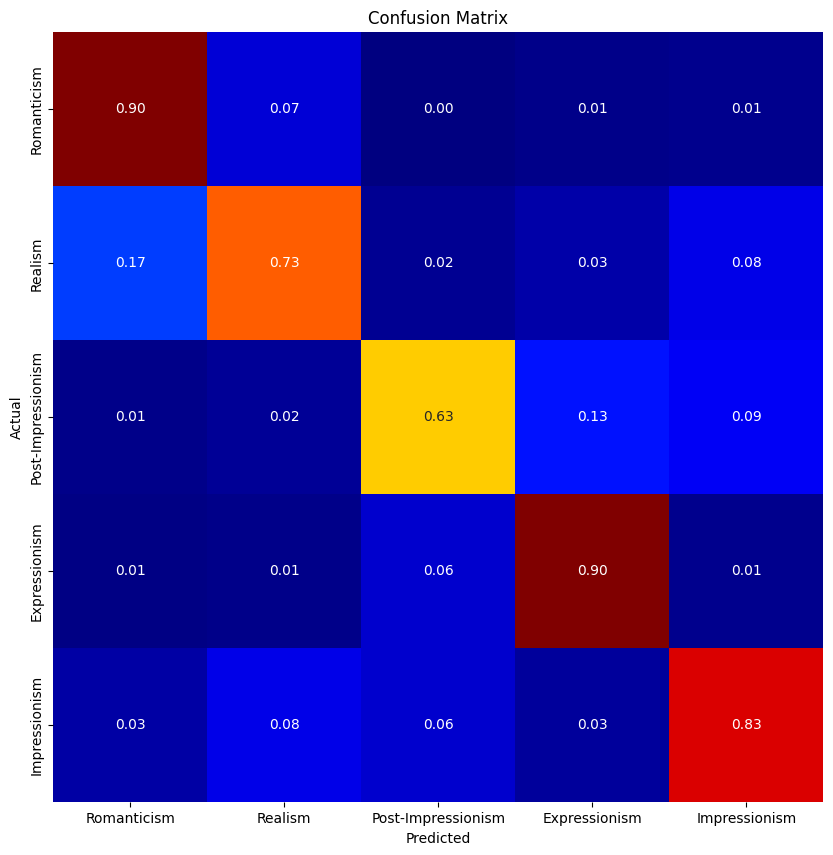

Classification Report:
                    precision    recall  f1-score   support

       Romanticism       0.80      0.90      0.85      1909
           Realism       0.80      0.73      0.76      2095
Post-Impressionism       0.81      0.63      0.71      1190
     Expressionism       0.82      0.90      0.86      1380
     Impressionism       0.80      0.83      0.82      2066

          accuracy                           0.81      8640
         macro avg       0.81      0.80      0.80      8640
      weighted avg       0.81      0.81      0.80      8640



In [21]:
# Classification report and confusion matrix
from sklearn.metrics import *
import seaborn as sns

tick_labels = artstyles.tolist()
def showClassficationReport_Generator(model, valid_generator, STEP_SIZE_VALID):
    # Loop on each generator batch and predict
    y_pred, y_true = [], []
    for i in range(STEP_SIZE_VALID):
        (X,y) = next(valid_generator)
        y_pred.append(model.predict(X))
        y_true.append(y)
    # Create a flat list for y_true and y_pred
    y_pred = [subresult for result in y_pred for subresult in result]
    y_true = [subresult for result in y_true for subresult in result]
     # Update Truth vector based on argmax
    y_true = np.argmax(y_true, axis=1)
    y_true = np.asarray(y_true).ravel()
    # Update Prediction vector based on argmax
    y_pred = np.argmax(y_pred, axis=1)
    y_pred = np.asarray(y_pred).ravel()

    # Confusion Matrix
    fig, ax = plt.subplots(figsize=(10,10))
    conf_matrix = confusion_matrix(y_true, y_pred, labels=np.arange(n_classes))
    conf_matrix = conf_matrix/np.sum(conf_matrix, axis=1)
    sns.heatmap(conf_matrix, annot=True, fmt=".2f", square=True, cbar=False,
                cmap=plt.cm.jet, xticklabels=tick_labels, yticklabels=tick_labels,
                ax=ax)
    ax.set_ylabel('Actual')
    ax.set_xlabel('Predicted')
    ax.set_title('Confusion Matrix')
    plt.show()
    print('Classification Report:')
    print(classification_report(y_true, y_pred, labels=np.arange(n_classes), target_names=artstyles.tolist()))

showClassficationReport_Generator(model, valid_generator, STEP_SIZE_VALID)

### Evaluate performance by predicting on random images from dataset


1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


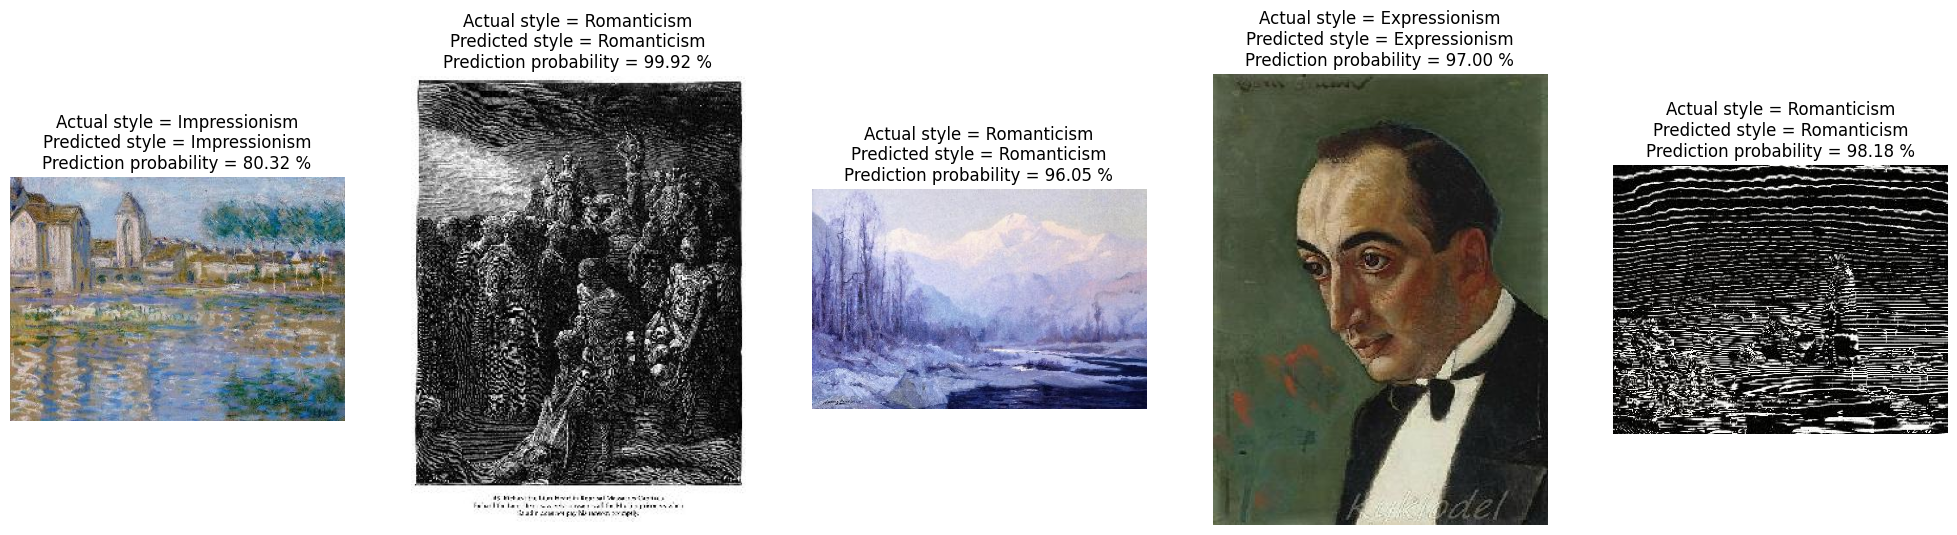

In [22]:
# Prediction
from keras.preprocessing import *

n = 5
fig, axes = plt.subplots(1, n, figsize=(25,10))

for i in range(n):
    random_art = random.choice(artstyles)
    random_image = random.choice(os.listdir(os.path.join(filtered_imgdir, random_art)))
    random_image_file = os.path.join(filtered_imgdir, random_art, random_image)

# Original image

    test_image = image.load_img(random_image_file, target_size=(train_input_shape[0:2]))
    # Predict artist
    test_image = image.img_to_array(test_image)
    test_image /= 255.
    test_image = np.expand_dims(test_image, axis=0)

    prediction = model.predict(test_image)
    prediction_probability = np.amax(prediction)
    prediction_idx = np.argmax(prediction)

    labels = train_generator.class_indices
    labels = dict((v,k) for k,v in labels.items())


    title = "Actual style = {}\nPredicted style = {}\nPrediction probability = {:.2f} %" \
                .format(random_art.replace('_', ' '), labels[prediction_idx].replace('_', ' '),
                        prediction_probability*100)

    # Print image
    axes[i].imshow(plt.imread(random_image_file))
    axes[i].set_title(title)
    axes[i].axis('off')

plt.show()



### Predicting the style of a random image from the web


<ipython-input-23-d1cbdb7d1f0f>:6: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  web_image = imageio.imread(url)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 539ms/step
Predicted style = Post-Impressionism
Prediction probability = 92.01312065124512 %


<ipython-input-23-d1cbdb7d1f0f>:20: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  plt.imshow(imageio.imread(url))


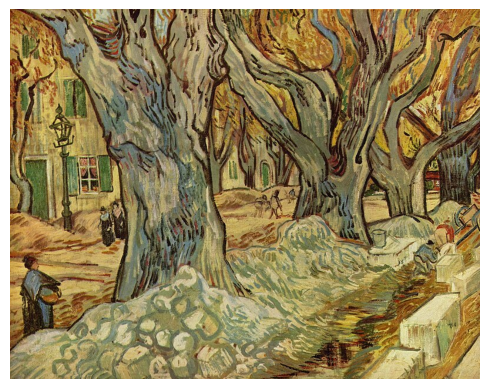

In [23]:

url = 'https://upload.wikimedia.org/wikipedia/commons/thumb/0/03/Vincent_Willem_van_Gogh_132.jpg/800px-Vincent_Willem_van_Gogh_132.jpg'

import imageio
import cv2

web_image = imageio.imread(url)
web_image = cv2.resize(web_image, dsize=train_input_shape[0:2], )
web_image = image.img_to_array(web_image)
web_image /= 255.
web_image = np.expand_dims(web_image, axis=0)


prediction = model.predict(web_image)
prediction_probability = np.amax(prediction)
prediction_idx = np.argmax(prediction)

print("Predicted style =", labels[prediction_idx].replace('_', ' '))
print("Prediction probability =", prediction_probability*100, "%")

plt.imshow(imageio.imread(url))
plt.axis('off')
plt.show()